In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_process as arima_process
import statsmodels.graphics.tsaplots as tsaplots


In [3]:

# Generating a time series by creating an autoregressive moving averate (ARMA) process object
# where autoregressive attribute is set to [1,-0.8] and the moving average attribute is set to [1]
process = arima_process.ArmaProcess(ar=[1, -0.8], ma=[1])

# take a sample of the process of size = 100
sample_z = process.generate_sample(nsample=100)


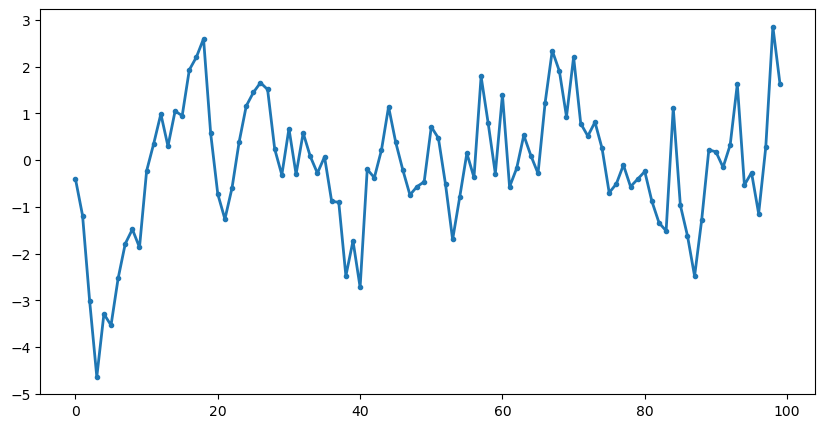

In [4]:

# plot sample using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(sample_z, linewidth=2, marker='.')


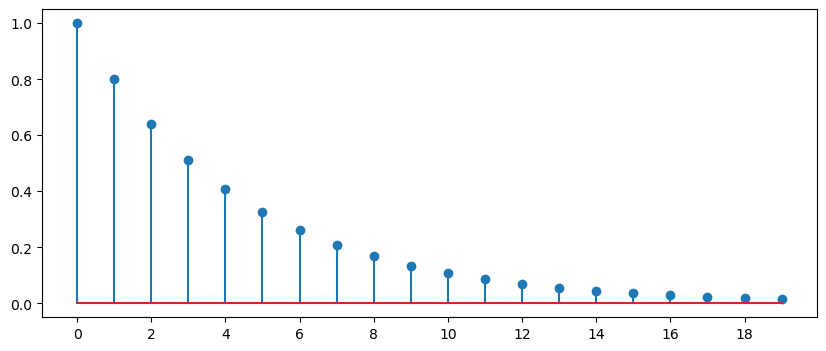

In [5]:

# get number of lags/coeficients using the autocorrelations function (ACF)
ac_coefs = process.acf(lags=20)

# Plot the theoretical correlations from ACF
plt.figure(figsize=(10, 4))
plt.stem(ac_coefs)
plt.xticks(ticks=range(0,20,2))
plt.show()


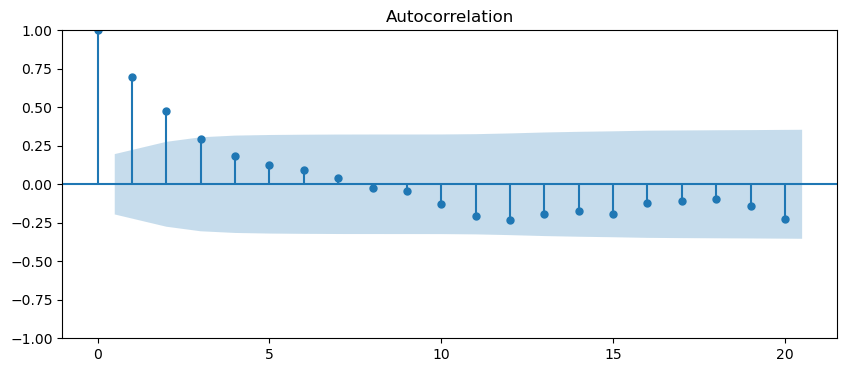

In [6]:

# Plotting sample autocorrelations using TSA packaga
# (NOTE: when the coeficients from the ACF function are in the 
# blue region of the graph we cannot reject the hypothesis
# that the autocorrelations equal zero)
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(sample_z, lags=20, ax=ax)
plt.show()



In [7]:
# examining sunspot dataset
sunspots = pd.read_csv('data/sunspots.csv')
sunspots.head()

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [8]:
pd.to_datetime(sunspots.loc[0,'YEAR'])

Timestamp('1970-01-01 00:00:00.000001700')

In [9]:
# set index
sunspots = sunspots.set_index(pd.to_datetime(sunspots['YEAR']))
sunspots.drop(columns=['YEAR'], inplace=True)
sunspots.head()

,SUNACTIVITY
YEAR,
1970-01-01 00:00:00.000001700,5.0
1970-01-01 00:00:00.000001701,11.0
1970-01-01 00:00:00.000001702,16.0
1970-01-01 00:00:00.000001703,23.0
1970-01-01 00:00:00.000001704,36.0


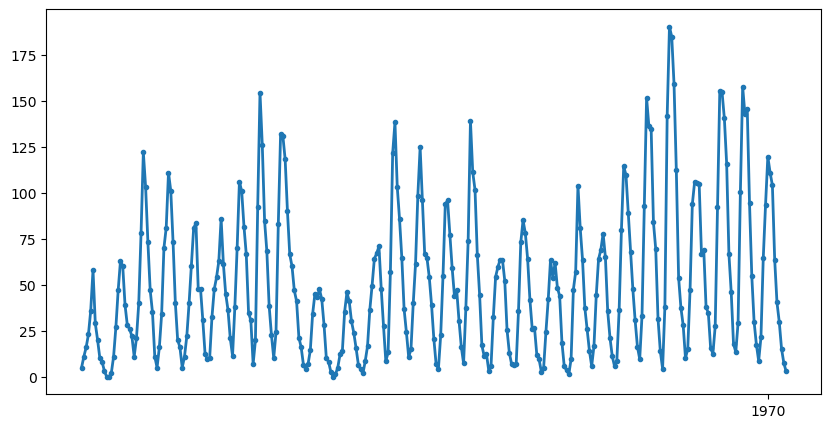

In [16]:
# sunspots.plot()
plt.figure(figsize=(10, 5))
plt.plot(sunspots, linewidth=2, marker='.')


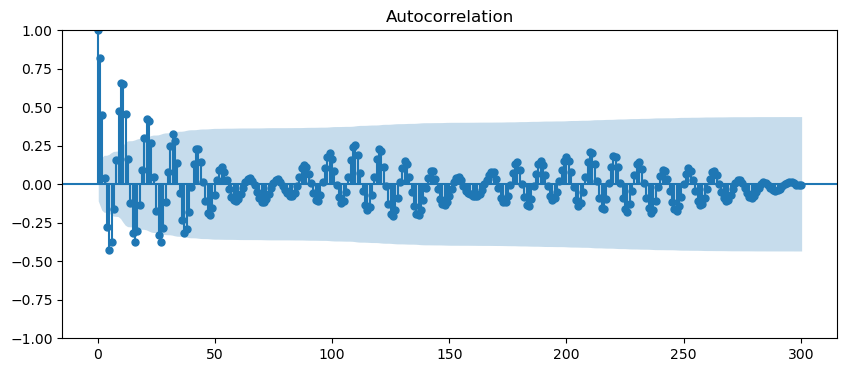

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(sunspots, lags=300, ax=ax)
plt.show()


In [13]:
# Make time series stationary by taking a difference
diff_sunspots = sunspots.diff().dropna()
diff_sunspots

,SUNACTIVITY
YEAR,
1970-01-01 00:00:00.000001701,6.0
1970-01-01 00:00:00.000001702,5.0
1970-01-01 00:00:00.000001703,7.0
1970-01-01 00:00:00.000001704,13.0
1970-01-01 00:00:00.000001705,22.0
...,...
1970-01-01 00:00:00.000002004,-23.3
1970-01-01 00:00:00.000002005,-10.6
1970-01-01 00:00:00.000002006,-14.6


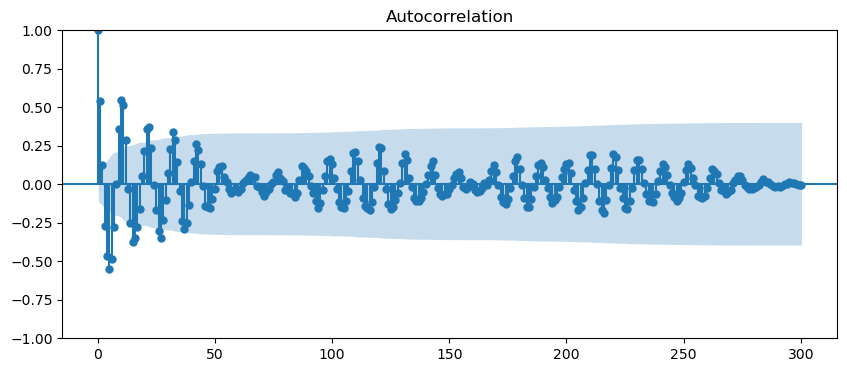

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(diff_sunspots, lags=300, ax=ax)
plt.show()
